# 1. Problem Statement
 
Students are expected to identify a classification / regression problem of your choice. You have to detail the problem under this heading which basically addresses the following questions.
 
   1. What is the problem that you are trying to solve?
   2. What kind of prediction (classification / regression) task are you performing?

ENSURE THAT YOU ARE USING NUMERICAL / CATEGORICAL DATA only.

DO NOT use images or textual data.

Score: 1 Mark in total (0.5 mark each)

### --------------Type the answers below this line-------------- 
#### 1. We are trying to use the past bank customer data to predict the eligibility of upcoming customer applying for loan on the basis of past experience . The ML model will help us automate the decision making process of the eligibility check based on the past customer records we have.

##### 2. We are using classification model to determine the loan eligibilitity of the customer. Since the input data is discreter and expected output data is a binary value, this can be considered as a classification problem

# 2. Data Acquisition
 
For the problem identified by you, students have to find the data source themselves from any data source.

## 2.1 Download the data directly



In [36]:
##---------Type the code below this line------------------##
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SMOTEN
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Input, Dense
import tensorflow as tf
from tensorflow.keras.layers import InputLayer
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
filename = r'/content/drive/MyDrive/Colab Notebooks/training_data_set_loan_eligibility_prediction.csv'
df_loan = pd.read_csv(filename)


Mounted at /content/drive


## 2.2 Code for converting the above downloaded data into a form suitable for DL 

In [9]:
##---------Type the code below this line------------------##
df_loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,NotGraduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## 2.3 Write your observations from the above. 

1. Size of the dataset
2. What type of data attributes are there?

Score: 2 Mark

In [10]:
##---------Type the code below this line------------------##
print(df_loan.shape)
print("Question 1. There are totally 13 columns and 614 values of the input data set")
print(" ")
print("Question 2.")
print("Loan_ID -> Nominal Attribute")
print("Gender, Married, Self_employed, Loan_Status - > Binary Attribute")
print("Education -> Discrete Attribute")
print("Dependents,applicatio_income, coapplicant_income, Loan Amount  -> Continuos Attribute")
print(" ")
print("The attributes can also categorized as categorical and numerical")
print("ApplicantIncome,CoapplicantIncome and LoanAmount can be called as numerical variables")
print("Loan_Id, gender, married, self_employed, loan_status, education can be called as categorical variables")

(614, 13)
Question 1. There are totally 13 columns and 614 values of the input data set
 
Question 2.
Loan_ID -> Nominal Attribute
Gender, Married, Self_employed, Loan_Status - > Binary Attribute
Education -> Discrete Attribute
Dependents,applicatio_income, coapplicant_income, Loan Amount  -> Continuos Attribute
 
The attributes can also categorized as categorical and numerical
ApplicantIncome,CoapplicantIncome and LoanAmount can be called as numerical variables
Loan_Id, gender, married, self_employed, loan_status, education can be called as categorical variables


# 3. Data Preparation

Perform the data prepracessing that is required for the data that you have downloaded. 


## 3.1 Apply techiniques
* to remove duplicate data
* to impute or remove missing data
* to remove data inconsistencies

IF ANY

In [11]:
##---------Type the code below this line------------------##
print("Below contains the number of missing values in each column")
print(" ")
print(df_loan.isnull().sum())
print(" ")
print("Gender, Married, Dependents, Self_employed, LoanAmount, LoanAmountTerm & Credit_History are missing data")

Below contains the number of missing values in each column
 
Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64
 
Gender, Married, Dependents, Self_employed, LoanAmount, LoanAmountTerm & Credit_History are missing data


Heat Map to visualize missing data


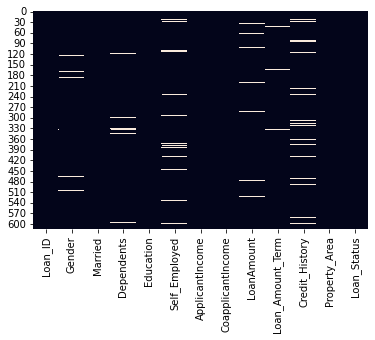

In [12]:
print("Heat Map to visualize missing data")
sns.heatmap(df_loan.isnull(), cbar=False)

In [13]:
##---------Type the code below this line------------------##
print("Imputing the data using Mode for categorical columns and mean for numerical columns")
df_loan['Gender'].fillna(df_loan['Gender'].mode()[0],inplace=True)
df_loan['Married'].fillna(df_loan['Married'].mode()[0],inplace=True)
df_loan['Dependents'].fillna(df_loan['Dependents'].mode()[0],inplace=True)
df_loan['Self_Employed'].fillna(df_loan['Self_Employed'].mode()[0],inplace=True)
df_loan['Credit_History'].fillna(df_loan['Credit_History'].mode()[0],inplace=True)
df_loan['Loan_Amount_Term'].fillna(df_loan['Loan_Amount_Term'].mode()[0],inplace=True)
df_loan['LoanAmount'].fillna(df_loan['LoanAmount'].mean(),inplace=True)
df_loan['CoapplicantIncome'].fillna(df_loan['CoapplicantIncome'].mean(),inplace=True)


print(" ")

print("cross verifying the data after imputation")
print(df_loan.isnull().sum())

Imputing the data using Mode for categorical columns and mean for numerical columns
 
cross verifying the data after imputation
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


## 3.2 Encode categorical data

In [20]:
##---------Type the code below this line------------------##

print("Apply one hot encoding for categorical columns like Gender, married,Education ,self_employed and Loan_Status ")

df_loan_dropped = df_loan.drop(['Loan_ID'], axis = 1)
df_loan_new = pd.get_dummies(df_loan_dropped)

df_loan_new
##Drop columns
df_loan_new = df_loan_new.drop(['Gender_Female', 'Married_No', 'Education_NotGraduate', 
              'Self_Employed_No', 'Loan_Status_N'], axis = 1)

# Rename columns name
new = {'Gender_Male': 'Gender', 'Married_Yes': 'Married', 
       'Education_Graduate': 'Education', 'Self_Employed_Yes': 'Self_Employed',
       'Loan_Status_Y': 'Loan_Status'}
       
df_loan_new.rename(columns=new, inplace=True)
df_loan_new

Apply one hot encoding for categorical columns like Gender, married,Education ,self_employed and Loan_Status 


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education,Self_Employed,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status
0,5849,0.0,146.412162,360.0,1.0,1,0,1,0,0,0,1,0,0,0,1,1
1,4583,1508.0,128.000000,360.0,1.0,1,1,0,1,0,0,1,0,1,0,0,0
2,3000,0.0,66.000000,360.0,1.0,1,1,1,0,0,0,1,1,0,0,1,1
3,2583,2358.0,120.000000,360.0,1.0,1,1,1,0,0,0,0,0,0,0,1,1
4,6000,0.0,141.000000,360.0,1.0,1,0,1,0,0,0,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71.000000,360.0,1.0,0,0,1,0,0,0,1,0,1,0,0,1
610,4106,0.0,40.000000,180.0,1.0,1,1,0,0,0,1,1,0,1,0,0,1
611,8072,240.0,253.000000,360.0,1.0,1,1,0,1,0,0,1,0,0,0,1,1
612,7583,0.0,187.000000,360.0,1.0,1,1,0,0,1,0,1,0,0,0,1,1


## 3.3 Normalize the data

Plotting Gender


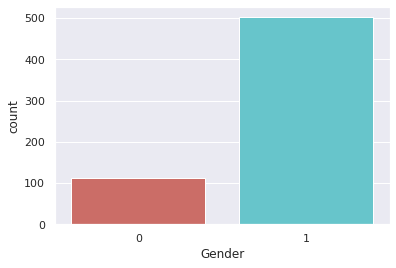

Plotting Married


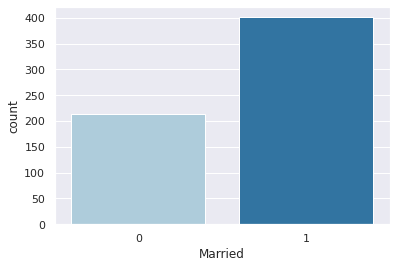

In [21]:
##---------Type the code below this line------------------##

print("Plotting Gender")
sns.countplot(x="Gender", data=df_loan_new, palette="hls")
plt.show()

print("Plotting Married")
sns.countplot(x="Married", data=df_loan_new, palette="Paired")
plt.show()

Plotting Education


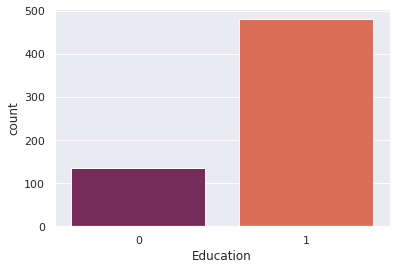

Plotting Self_Employed


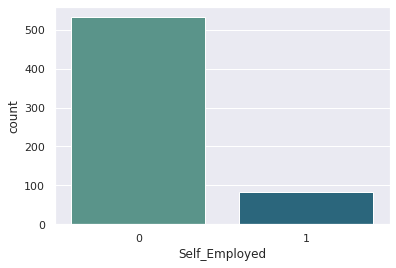

Credit_History


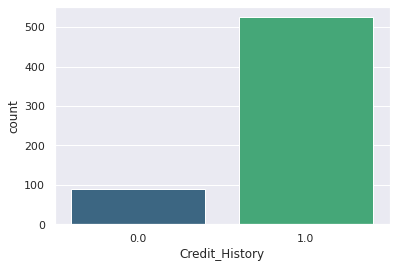

In [22]:
print("Plotting Education")
sns.countplot(x="Education", data=df_loan_new, palette="rocket")
plt.show()

print("Plotting Self_Employed")
sns.countplot(x="Self_Employed", data=df_loan_new, palette="crest")
plt.show()

print("Credit_History")
sns.countplot(x="Credit_History", data=df_loan_new, palette="viridis")
plt.show()

Loan_Status


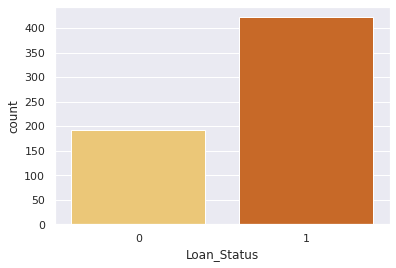

Loan_Amount_Term


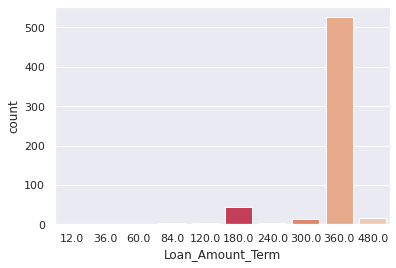

In [23]:

print("Loan_Status")
sns.countplot(x="Loan_Status", data=df_loan_new, palette="YlOrBr")
plt.show()


print("Loan_Amount_Term")
sns.countplot(x="Loan_Amount_Term", data=df_loan_new, palette="rocket")
plt.show()

Plotting ApplicantIncome, CoapplicantIncome, LoanAmount


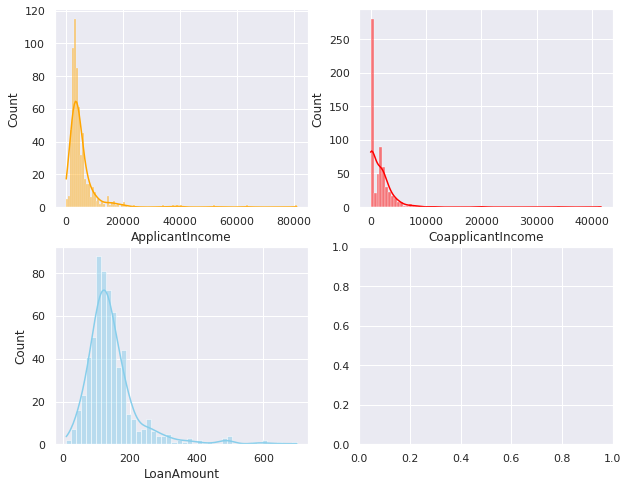

In [24]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

print("Plotting ApplicantIncome, CoapplicantIncome, LoanAmount")
sns.histplot(data=df_loan_new, x="ApplicantIncome", kde=True, ax=axs[0, 0], color='orange')
sns.histplot(data=df_loan_new, x="CoapplicantIncome", kde=True, ax=axs[0, 1], color='red')
sns.histplot(data=df_loan_new, x="LoanAmount", kde=True, ax=axs[1, 0], color='skyblue');

In [25]:
df_loan_new.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education,Self_Employed,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status
0,5849,0.0,146.412162,360.0,1.0,1,0,1,0,0,0,1,0,0,0,1,1
1,4583,1508.0,128.000000,360.0,1.0,1,1,0,1,0,0,1,0,1,0,0,0
2,3000,0.0,66.000000,360.0,1.0,1,1,1,0,0,0,1,1,0,0,1,1
3,2583,2358.0,120.000000,360.0,1.0,1,1,1,0,0,0,0,0,0,0,1,1
4,6000,0.0,141.000000,360.0,1.0,1,0,1,0,0,0,1,0,0,0,1,1


## 3.4 Feature Engineering 

if any

Plotting numerical data
Removing the outliers in ApplicantIncome, CoapplicantIncome and Loan Amount


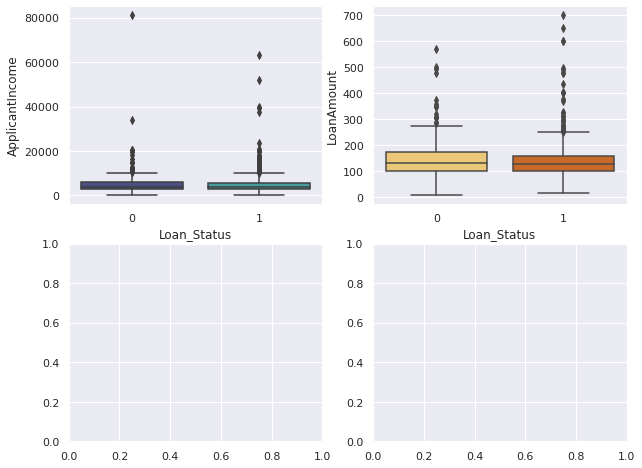

In [26]:
##---------Type the code below this line------------------##

print("Plotting numerical data")
sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

sns.boxplot(x="Loan_Status", y="ApplicantIncome", data=df_loan_new, ax=axs[0, 0],palette="mako");

sns.boxplot(x="Loan_Status", y="LoanAmount", data=df_loan_new, ax=axs[0, 1], palette="YlOrBr");

print("Removing the outliers in ApplicantIncome, CoapplicantIncome and Loan Amount")

From the previous section, it is observed that
ApplicantIncome, CoapplicantIncome and loan Amount have outliers and positively skewed

LoanTerm has outliers and is negetively skewed
Using square root transformation to normalize the distribution
printing the normally distributed again
Plotting ApplicantIncome, CoapplicantIncome, LoanAmount


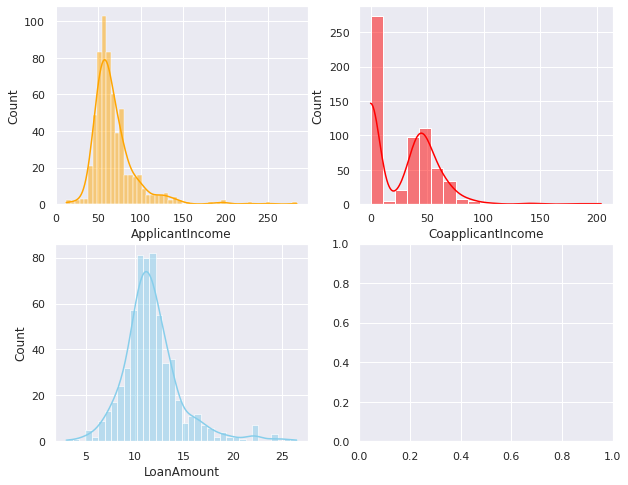

In [27]:

print("From the previous section, it is observed that")
print("ApplicantIncome, CoapplicantIncome and loan Amount have outliers and positively skewed")
print("")
print("LoanTerm has outliers and is negetively skewed")



print("Using square root transformation to normalize the distribution")
df_loan_new.ApplicantIncome = np.sqrt(df_loan_new.ApplicantIncome)
df_loan_new.CoapplicantIncome = np.sqrt(df_loan_new.CoapplicantIncome)
df_loan_new.LoanAmount = np.sqrt(df_loan_new.LoanAmount)

print("printing the normally distributed again")
sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

print("Plotting ApplicantIncome, CoapplicantIncome, LoanAmount")
sns.histplot(data=df_loan_new, x="ApplicantIncome", kde=True, ax=axs[0, 0], color='orange')
sns.histplot(data=df_loan_new, x="CoapplicantIncome", kde=True, ax=axs[0, 1], color='red')
sns.histplot(data=df_loan_new, x="LoanAmount", kde=True, ax=axs[1, 0], color='skyblue');

## 3.5 Identify the target variables.

* Separate the data front the target such that the dataset is in the form of (X,y) or (Features, Label)

* Discretize / Encode the target variable or perform one-hot encoding on the target or any other as and if required.



separating the dependant feature [loan_status] variable from the independant variables


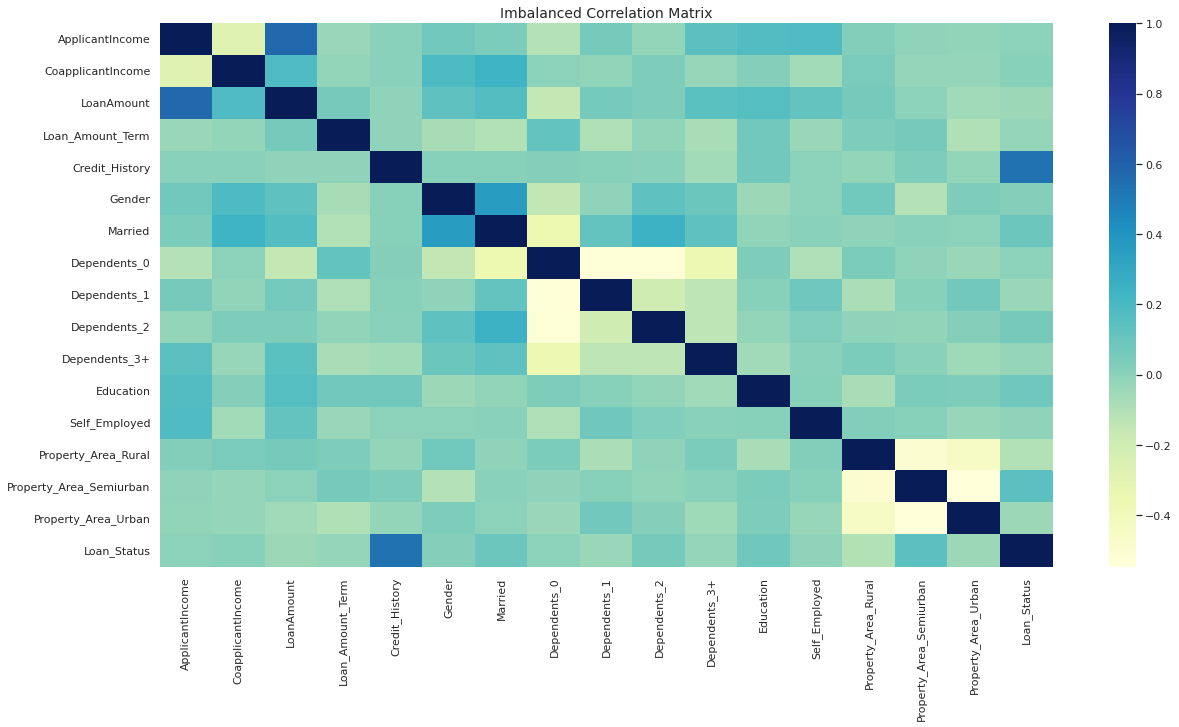

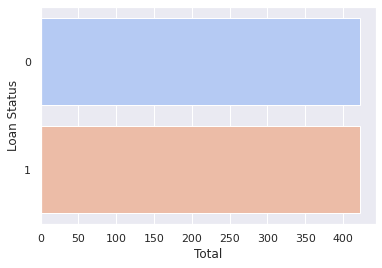

In [28]:
##---------Type the code below this line------------------##
print("separating the dependant feature [loan_status] variable from the independant variables")
X = df_loan_new.drop(["Loan_Status"], axis=1)
y = df_loan_new["Loan_Status"]

# Sample figsize in inches
fig, ax = plt.subplots(figsize=(20,10))         
# Imbalanced DataFrame Correlation
corr = df_loan_new.corr()
sns.heatmap(corr, cmap='YlGnBu', annot_kws={'size':30}, ax=ax)
ax.set_title("Imbalanced Correlation Matrix", fontsize=14)
plt.show()

X, y = SMOTE(random_state=10, sampling_strategy='auto').fit_resample(X, y)
X = MinMaxScaler().fit_transform(X)


sns.set_theme(style="darkgrid")
sns.countplot(y=y, data=df_loan_new, palette="coolwarm")
plt.ylabel('Loan Status')
plt.xlabel('Total')
plt.show()

## 3.6 Split the data into training set and testing set

In [29]:
##---------Type the code below this line------------------##
print("splitting the input data in 60% train and 40% split")

X_train, X_valtest, Y_train, Y_valtest = train_test_split(X, y, test_size = 0.4, random_state = 10)

# Train & Valid Data
x_test, x_val, y_test, y_val = train_test_split(X_valtest, Y_valtest, test_size = 0.2, random_state = 10)

splitting the input data in 60% train and 40% split


## 3.7 Report

Mention the method adopted  and justify why the method was used
* to remove duplicate data, if present 
* to impute or remove missing data, if present 
* to remove data inconsistencies, if present 
* to encode categorical data 
* the normalization technique used

If the any of the above are not present, then also add in the report below.

Report the size of the training dataset and testing dataset

Score: 3 Marks

##---------Type the answer below this line------------------##

#### 1. There were no duplicate data present
#### 2. Imputed the missing data by using mode for categorical column and mean for numerical column
#### 3. There were no data inconsistnencies found in the input data
#### 4. The input data was encoded using the one-hot encoding
#### 5. ApplicantIncome, CoapplicantIncome and loan Amount are positively skewed, hence used square root transformation for normalization


# 4. Deep Neural Network Architecture



## 4.1 Design the architecture that you will be using to solve the prediction problem identified.

* Add dense layers, specifying the number of units in each layer and the activation function used in the layer.

In [30]:
##---------Type the code below this line------------------##

input_neurons = X_train.shape[1]
# Output neurons (Since it is binary classification)
output_neurons = 1
# Defining hidden layers & neurons in each layersnumber_of_hidden_layers = 2
neuron_hidden_layer_1         = 10
neuron_hidden_layer_2         = 5
# Defining the architecture of the model
model = Sequential()

model.add(Dense(units=input_neurons, activation='relu'))
model.add(Dense(units=neuron_hidden_layer_1, activation='relu'))
model.add(Dense(units=neuron_hidden_layer_2, activation='relu'))
model.add(Dense(units=output_neurons, activation='sigmoid'))

## 4.2 Report

Report the following and provide justification for the same.

* Number of layers
* Number of units in each layer
* Activation function used in each hidden layer
* Activation function used in the output layer
* Total number of trainable parameters 

Score: 4 Marks

##---------Type the answer below this line------------------##

#### Number of hidden layer = 2
#### input layer = 16, layer_1 = 10, layer_2 = 5, output = 1
#### Hidden Layer Activation function = relu
##### Output Layer Activation Funcation = sigmoid

# 5. Training the model


## 5.1 Configure the training

Configure  the model for training, by using appropriate optimizers and regularizations



In [31]:
##---------Type the code below this line------------------##

model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=["mae", "accuracy"])
early_stop = EarlyStopping(
        monitor='val_loss', 
        mode='auto', 
        verbose=1,
        patience=500
)

## 5.2 Train the model

In [32]:
##---------Type the code below this line------------------##
model_history = model.fit(X_train, Y_train, validation_data = (x_val, y_val), epochs = 5000,verbose=0, callbacks=[early_stop])
model.evaluate(x_test,y_test)

Epoch 613: early stopping
9/9 [==============================] - 0s 2ms/step - loss: 0.7273 - mae: 0.2115 - accuracy: 0.8148


[0.727324903011322, 0.21151572465896606, 0.8148148059844971]

Justify your choice of optimizers and regulizations used and the hyperparameters tuned

Score: 4 Marks

##---------Type the answers below this line------------------##

#### Chose to use the relu activation function as it's the widely used activation function. Also tried with selu activation funcation but it didn't improve the accuracy
#### Used sigmoid as the activation function for output layer since it was binary classification problem.
#### There are totally 2 hidden layer with 10 and 5 neurons which provided us the best accuracy
#### Used binary_crossentropy loss funcation considering the y values were one-hot encoded and only two classes (binary)
#### Chose Adam as the optimiser as it's fast with it's computation and has the combined benefits of  both AdaGrad and RMSProp
#### Also used EarlyStopping function. Too many epochs can lead to overfitting of the training dataset, whereas too few may result in an underfit model. Early stopping allows us to specify an arbitrary large number of training epochs and stop training once the model performance stops improving.  Have provided a large epoch number and patience of 500 to make sure the training is stopped early if there's no significant improvement over a 500 epoch run. 

# 6. Test the model

Score: 2 Marks

In [33]:
##---------Type the code below this line------------------##

# Getting predictions for the test set
y_pred = np.argmax(model.predict(x_test),axis=1)
y_val_pred = np.argmax(model.predict(x_val),axis=1)



print(" ")

# Getting accuracy score
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy test: %f' % accuracy)
accuracy = accuracy_score(y_val, y_val_pred)
print('Accuracy val: %f' % accuracy)

print("")
# precision tp / (tp + fp)
precision = precision_score(y_test, y_pred, average='micro')
print('Precision test: %f' % precision)
precision = precision_score(y_val, y_val_pred, average='micro')
print('Precision val: %f' % precision)


print("")
# recall: tp / (tp + fn)
recall = recall_score(y_test, y_pred, average='micro')
print('Recall test: %f' % recall)
recall = recall_score(y_val, y_val_pred, average='micro')
print('Recall val: %f' % recall)


print("")
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_pred, average='micro')
print('F1 score test: %f' % f1)
f1 = f1_score(y_val, y_val_pred, average='micro')
print('F1 score val: %f' % f1)


print("")
mea = mean_absolute_error(y_test, y_pred)
print('MEA test: %f' % mea)
mea = mean_absolute_error(y_val, y_val_pred)
print('MEA val: %f' % mea)


print(" ")
print("Confusion Matrix test")
print(confusion_matrix(y_test, y_pred))

print("Confusion Matrix val")
print(confusion_matrix(y_val, y_val_pred))

print(" ")



3/3 [==============================] - 0s 3ms/step
 
Accuracy test: 0.522222
Accuracy val: 0.529412

Precision test: 0.522222
Precision val: 0.529412

Recall test: 0.522222
Recall val: 0.529412

F1 score test: 0.522222
F1 score val: 0.529412

MEA test: 0.477778
MEA val: 0.470588
 
Confusion Matrix test
[[141   0]
 [129   0]]
Confusion Matrix val
[[36  0]
 [32  0]]
 


## 7. Conclusion 

Plot the training and validation loss
Report the testing accuracy and loss.

Report values for preformance study metrics like accuracy, precision, recall, F1 Score.

A proper comparision based on different metrics should be done and not just accuracy alone, only then the comparision becomes authentic. You may use Confusion matrix, classification report, MAE etc per the requirement of your application/problem.

Score 2 Marks

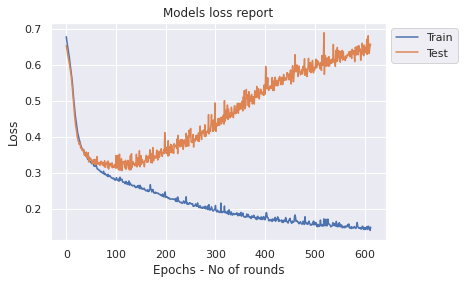

In [34]:
##---------Type the code below this line------------------##
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Models loss report')
plt.ylabel('Loss')
plt.xlabel('Epochs - No of rounds')
plt.legend(['Train', 'Test'], loc = 'upper left', bbox_to_anchor = (1,1))
plt.show()

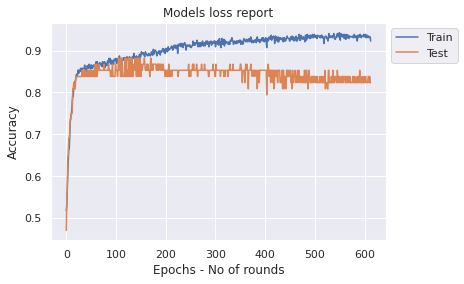

In [35]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Models loss report')
plt.ylabel('Accuracy')
plt.xlabel('Epochs - No of rounds')
plt.legend(['Train', 'Test'], loc = 'upper left', bbox_to_anchor = (1,1))
plt.show()

## 8. Solution

What is the solution that is proposed to solve the business problem discussed in Section 1. Also share your learnings while working through solving the problem in terms of challenges, observations, decisions made etc.

Score 2 Marks

### ---------Type the answers below this line------------------##

#### we can use this sequential model to predict the loan status of the applicants using the data provided in their application.

### Challenges 
#### The data was skewed and running on the original input resulted in very low accruacy and had to be oversamppled for minority class using SMOTE technique.
####  Decided to go with the 0.2 spli as we wanted to have maximum number of data in the training set and have a reduced trainig set resulted in very low accuracy. was looking achieving low loss and high accuracy on the training data set

##NOTE
All Late Submissions will incur a penalty of -2 marks. So submit your assignments on time.

Good Luck